In [1]:
# import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import spacy

In [2]:
# read in the dataset
train_data = pd.read_csv('Corona_NLP_train.csv', encoding='latin1')
test_data = pd.read_csv('Corona_NLP_test.csv', encoding='latin1')

### Exploratory Data Analysis

In [3]:
train_data.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


In [4]:
# train dataset info
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41157 entries, 0 to 41156
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       41157 non-null  int64 
 1   ScreenName     41157 non-null  int64 
 2   Location       32567 non-null  object
 3   TweetAt        41157 non-null  object
 4   OriginalTweet  41157 non-null  object
 5   Sentiment      41157 non-null  object
dtypes: int64(2), object(4)
memory usage: 1.9+ MB


In [5]:
# Checking for missing data 
train_data.isna().sum()

UserName            0
ScreenName          0
Location         8590
TweetAt             0
OriginalTweet       0
Sentiment           0
dtype: int64

In [6]:
# test dataset info
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3798 entries, 0 to 3797
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       3798 non-null   int64 
 1   ScreenName     3798 non-null   int64 
 2   Location       2964 non-null   object
 3   TweetAt        3798 non-null   object
 4   OriginalTweet  3798 non-null   object
 5   Sentiment      3798 non-null   object
dtypes: int64(2), object(4)
memory usage: 178.2+ KB


In [7]:
# Checking for missing data 
test_data.isna().sum()

UserName           0
ScreenName         0
Location         834
TweetAt            0
OriginalTweet      0
Sentiment          0
dtype: int64

In [8]:
# How balanced is the dataset?
train_data['Sentiment'].value_counts()

Positive              11422
Negative               9917
Neutral                7713
Extremely Positive     6624
Extremely Negative     5481
Name: Sentiment, dtype: int64

C:\Users\HP\Anaconda3\envs\nas_env\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


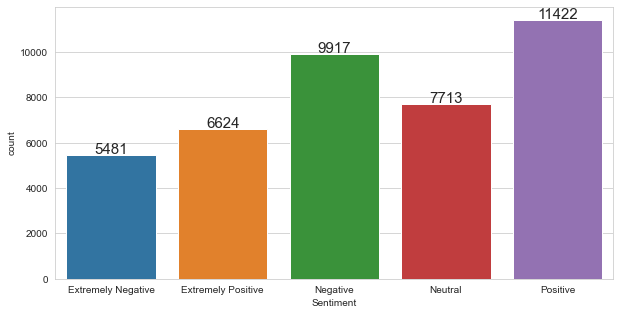

In [9]:
sns.set_style("whitegrid")
plt.figure(figsize=(10,5))

plots = sns.countplot(train_data['Sentiment'].sort_values(ascending=True), data = train_data)

for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.0f'),  
                       (bar.get_x() + bar.get_width() / 2,  
                        bar.get_height()), ha='center', va='center', 
                       size=15, xytext=(0, 5), 
                       textcoords='offset points') 

In [10]:
Ex_positive_tweets = train_data.groupby('Sentiment').get_group('Extremely Positive')
Ex_positive_tweets.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
11,3810,48762,"Pitt Meadows, BC, Canada",16-03-2020,"Due to the Covid-19 situation, we have increas...",Extremely Positive
12,3811,48763,Horningsea,16-03-2020,#horningsea is a caring community. LetÂs ALL ...,Extremely Positive
18,3817,48769,North America,16-03-2020,"Amazon Glitch Stymies Whole Foods, Fresh Groce...",Extremely Positive
22,3821,48773,NaN,16-03-2020,We have AMAZING CHEAP DEALS! FOR THE #COVID201...,Extremely Positive
23,3822,48774,NaN,16-03-2020,We have AMAZING CHEAP DEALS! FOR THE #COVID201...,Extremely Positive


In [11]:
# Countries with extremely positive COVID-19 tweets in descending order
# NaN represting tweeps with no location
Ex_positive_tweets.Location.value_counts().sort_values(ascending=False)[:20]

United States              91
London, England            74
New York, NY               71
London                     70
Washington, DC             68
United Kingdom             52
Los Angeles, CA            52
India                      49
San Francisco, CA          43
UK                         41
USA                        33
Toronto, Ontario           32
California, USA            31
Boston, MA                 28
Chicago, IL                27
England, United Kingdom    26
New Delhi, India           24
Australia                  23
Lagos, Nigeria             23
Canada                     23
Name: Location, dtype: int64

In [12]:
Ex_negative_tweets = train_data[train_data['Sentiment']=='Extremely Negative']
Ex_negative_tweets.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative
20,3819,48771,southampton soxx xxx,16-03-2020,with 100 nations inficted with covid 19 th...,Extremely Negative
27,3826,48778,Everywhere You Are!,16-03-2020,This morning I tested positive for Covid 19. I...,Extremely Negative
29,3828,48780,"Someplace, USA",16-03-2020,@7SealsOfTheEnd Soon with dwindling supplies u...,Extremely Negative
42,3841,48793,Houston,16-03-2020,CHECK VIDEO ?? https://t.co/1ksn9Brl02 ??No fo...,Extremely Negative


In [13]:
# Countries with extremely negative COVID-19 tweets in descending order
# NaN represting tweeps with no location
Ex_negative_tweets.Location.value_counts().sort_values(ascending=False)[:20]

London, England            81
London                     74
United States              64
Washington, DC             52
United Kingdom             47
New York, NY               46
England, United Kingdom    39
UK                         33
Australia                  31
India                      25
Los Angeles, CA            25
Global                     24
Toronto, Ontario           22
Canada                     22
USA                        20
New York, USA              19
Chicago, IL                19
Boston, MA                 18
California, USA            17
Houston, TX                15
Name: Location, dtype: int64

In [14]:
# Locations tweeting COVID-19
# Most tweeps have their locations off as such large NaN value, while the US and UK have most COVID tweets
train_data['Location'].value_counts().sort_values(ascending=False)[:20]

London                     540
United States              528
London, England            520
New York, NY               395
Washington, DC             373
United Kingdom             337
Los Angeles, CA            281
India                      268
UK                         232
Australia                  225
USA                        223
England, United Kingdom    191
Canada                     191
Toronto, Ontario           160
Global                     159
Chicago, IL                155
California, USA            153
San Francisco, CA          152
Boston, MA                 150
New York, USA              140
Name: Location, dtype: int64

In [15]:
# location per sentiment
l_s = pd.DataFrame(train_data.groupby('Location').Sentiment.value_counts().sort_values(ascending=False)[:20])
l_s.head(10)

,,Sentiment
Location,Sentiment,
London,Positive,157
United States,Positive,154
"London, England",Positive,144
London,Negative,134
"Washington, DC",Positive,114
"London, England",Negative,114
United States,Neutral,112
"London, England",Neutral,107
United States,Negative,107


<AxesSubplot:xlabel='Location,Sentiment'>

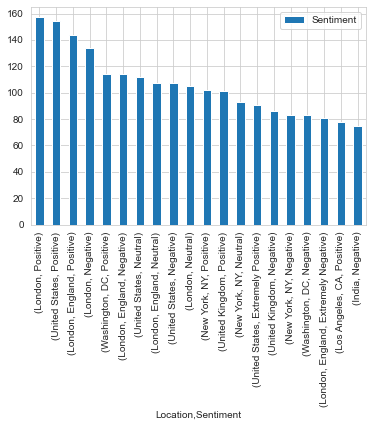

In [16]:
l_s.plot(kind='bar')

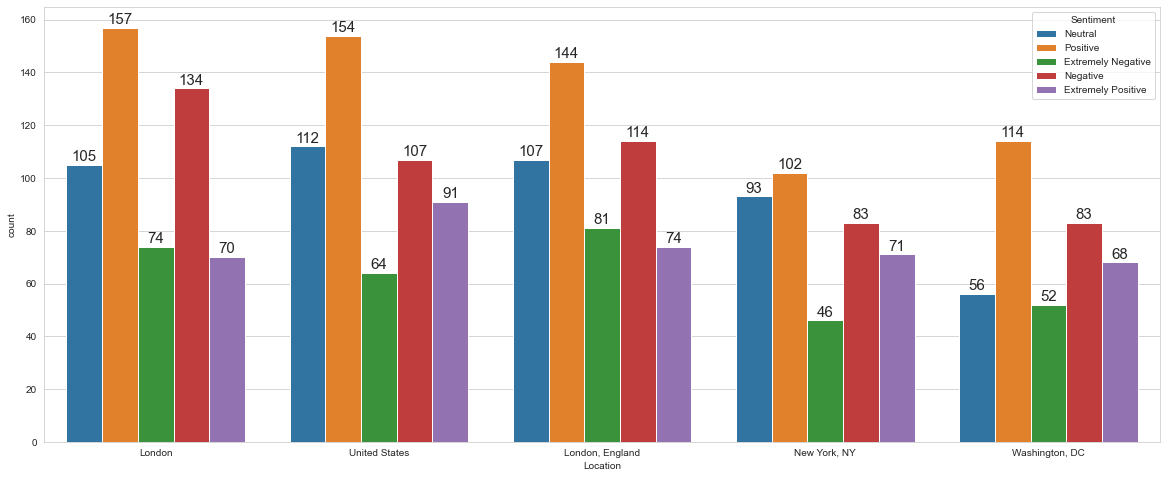

In [17]:
# The plot below shows COVID-19 tweets sentiment distribution from top tweeting locations

plt.figure(figsize=(20, 8))
plot = sns.countplot(x = train_data["Location"], hue =train_data["Sentiment"], data = train_data,
                     order = train_data['Location'].value_counts().sort_values(ascending=False)[:5].index)

for bar in plot.patches:
    plot.annotate(format(bar.get_height(), '.0f'), 
                   (bar.get_x() + bar.get_width() / 2., bar.get_height()), 
                   ha = 'center', va = 'center', 
                   size=15,
                   xytext = (0, 8), 
                   textcoords = 'offset points')

In [18]:
import re

In [19]:
# checking mentions related to COVID-19 tweets 
def find_mentions(data):
    mentions = []
    for i in range(len(data)):
        mention = re.findall(r'@\w+', data[i])
        mentions.extend(mention)
    return mentions

In [20]:
# most mentions related to COVID-19 tweets
pd.DataFrame(find_mentions(train_data['OriginalTweet'])).value_counts().sort_values(ascending=False)[:20]

@realDonaldTrump    247
@Tesco              185
@sainsburys         161
@BorisJohnson       150
@narendramodi       111
@amazon             109
@asda               105
@PMOIndia            96
@Morrisons           90
@piersmorgan         85
@YouTube             83
@waitrose            71
@CNN                 61
@AldiUK              54
@Walmart             53
@FTC                 52
@CDCgov              49
@NYGovCuomo          43
@BBCNews             42
@SkyNews             41
dtype: int64

In [21]:
# checking relevant hash-tags related to COVID-19 tweets 
def find_hashtags(data):
    tags = []
    for i in range(len(data)):
        tag = re.findall(r'#\w+', data[i])
        tags.extend(tag)
    return tags

In [22]:
# relevant hash-tags related to COVID-19 tweets
pd.DataFrame(find_hashtags(train_data['OriginalTweet'])).value_counts().sort_values(ascending=False)[:20]

#coronavirus            12954
#COVID19                 3364
#Covid_19                2589
#Coronavirus             2333
#COVID2019               1634
#toiletpaper             1410
#COVID                   1284
#covid19                 1127
#CoronaCrisis             734
#CoronaVirus              645
#SocialDistancing         641
#covid_19                 440
#pandemic                 414
#CoronavirusPandemic      414
#CoronavirusOutbreak      400
#Covid19                  347
#StayHomeSaveLives        345
#lockdown                 329
#StayAtHome               322
#supermarket              321
dtype: int64

## Data Cleaning/Preprocessing 

In [24]:
# import necessary libraries for preprocessing texts
import spacy
import string
from spacy.lang.en import English
from spacy.lang.en.stop_words import STOP_WORDS

In [25]:
punctuations = string.punctuation
parser = English()
stopwords = list(STOP_WORDS)

In [26]:
train_data.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


In [27]:
def preproces_text(dataset):
      
    # remove url if present in tweets
    tweets_wo_urls = re.sub(r'http\S+', ' ',dataset)
    # remove mentions if present in tweets
    tweets_wo_mentions = re.sub(r'@\w+', ' ', tweets_wo_urls)
    # remove hash-tags if present in tweets
    tweets_wo_tags = re.sub(r'#\w+',' ', tweets_wo_mentions)
    # remove irregular characters if present in tweets 
    tweets = re.sub('[^A-Za-z]+', ' ', tweets_wo_tags)
    # using spacy english library to pass tweets
    tokens = parser(tweets)
    # lemmatize tokens 
    tokens = [ word.lemma_.lower().strip() if word.lemma_ != "-PRON-" else word.lower_ for word in tokens ]
    # remove stop words and punctuations
    tokens = [ word for word in tokens if word not in stopwords and word not in punctuations ]
    
    return " ".join(tokens)


In [28]:
train_data['OriginalTweet']=train_data['OriginalTweet'].apply(lambda x: preproces_text(x))

In [29]:
train_data['Sentiment'].value_counts()

Positive              11422
Negative               9917
Neutral                7713
Extremely Positive     6624
Extremely Negative     5481
Name: Sentiment, dtype: int64

In [30]:
# convert labels to numeric feature
label_encode = {'Extremely Negative':0,'Negative': 1,'Neutral': 2,'Positive':3,'Extremely Positive':4}
train_data['Sentiment']=train_data['Sentiment'].map(label_encode)

In [31]:
train_data['Sentiment'].value_counts()

3    11422
1     9917
2     7713
4     6624
0     5481
Name: Sentiment, dtype: int64

In [32]:
from collections import Counter
Counter(train_data['Sentiment'])

Counter({2: 7713, 3: 11422, 0: 5481, 1: 9917, 4: 6624})

In [33]:
train_data[:5]

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,,2
1,3800,48752,UK,16-03-2020,advice talk neighbours family exchange phone n...,3
2,3801,48753,Vagabonds,16-03-2020,coronavirus australia woolworths elderly disab...,3
3,3802,48754,NaN,16-03-2020,food stock don t panic food need stay calm sta...,3
4,3803,48755,NaN,16-03-2020,ready supermarket outbreak m paranoid food sto...,0


In [35]:
# drop irrelevant features 
train_data = train_data.drop(['UserName', 'ScreenName', 'Location', 'TweetAt'], axis=1)

In [36]:
train_data.head()

,OriginalTweet,Sentiment
0,,2
1,advice talk neighbours family exchange phone n...,3
2,coronavirus australia woolworths elderly disab...,3
3,food stock don t panic food need stay calm sta...,3
4,ready supermarket outbreak m paranoid food sto...,0


In [ ]:
# train_data['OriginalTweet'].tolist()[1]

In [37]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')
from nltk import word_tokenize,sent_tokenize

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [38]:
all_words = ' '.join(list(train_data['OriginalTweet']))

In [39]:
# total word tokens
all_words = word_tokenize(all_words)

In [40]:
# total word tokens in the dataset after cleaning 
len(all_words)

601701

In [41]:
# total vocab in the dataset
vocab = set(all_words)

In [42]:
# 1 was added because of zero padding
vocab_size = len(vocab) + 1
vocab_size 

32059

In [ ]:
## Split the data

In [43]:
X_train = train_data['OriginalTweet']
y_train = train_data['Sentiment']

In [44]:
# Tokenize the vocab as ML/AI algorithm expects numerical values
from tensorflow.keras.preprocessing.text import Tokenizer

In [45]:
# initialize tokenizer
tokenizer = Tokenizer()
# fir tokenizer on dataset vocabulary
tokenizer.fit_on_texts(vocab)
# apply the token to the whole dataset
X_tokens = tokenizer.texts_to_sequences(X_train)
# convert dataset to array which is the required format for our algorithms
X_tokens = np.array(X_tokens)

In [46]:
X_tokens

array([list([]),
       list([1240, 21626, 2615, 17944, 14456, 11675, 26138, 4915, 29001, 12254, 11675, 26138, 2615, 18411, 20512, 14052, 25099, 3675, 7403, 11398, 2565, 17624, 3107, 6166, 31761, 10625, 16586]),
       list([19132, 13624, 2957, 15443, 18986, 19864, 11398, 20224, 6405, 21760, 15914]),
       ...,
       list([20232, 27071, 19355, 6811, 1626, 24344, 6524, 15108, 24220]),
       list([8829, 23374, 3173, 11309, 12057, 6471]),
       list([11401, 2311, 27071, 21582, 19556, 19629, 2745, 24784, 11439, 28953, 11279, 23227, 8574, 1543, 666, 12097, 9433, 31466, 27071, 10391, 21760, 6413])],
      dtype=object)

In [ ]:
# Check the tweet with the most token as we will need to pad tweet with fewer token 
# This is done as we need uniform token length for all tweet also the input layer in the embedding layer of LSTM requires so

In [47]:
token_length = [len(tokens) for tokens in X_tokens]
token_length = np.array(token_length)

In [48]:
# tweet with max token has 54 tokens
token_length.max()

54

In [49]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

# pad sequence the dataset to have uniform token length
X_train = pad_sequences(X_tokens, maxlen=token_length.max())

In [50]:
X_train

array([[    0,     0,     0, ...,     0,     0,     0],
       [    0,     0,     0, ..., 31761, 10625, 16586],
       [    0,     0,     0, ...,  6405, 21760, 15914],
       ...,
       [    0,     0,     0, ...,  6524, 15108, 24220],
       [    0,     0,     0, ..., 11309, 12057,  6471],
       [    0,     0,     0, ..., 10391, 21760,  6413]])

In [51]:
# categorical cross entropy requires get_dummies cause of it only accepts 0s and 1s
y_train = pd.get_dummies(train_data['Sentiment']).values

In [52]:
y_train

array([[0, 0, 1, 0, 0],
       [0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0],
       ...,
       [0, 0, 0, 1, 0],
       [0, 0, 1, 0, 0],
       [0, 1, 0, 0, 0]], dtype=uint8)

In [53]:
print(X.shape)
print(y.shape)

(41157, 54)
(41157, 5)


## LSTM Model 

In [54]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding,LSTM,Dropout,Dense
from tensorflow.keras.callbacks import EarlyStopping

In [55]:
# initialize a sequential model 
model = Sequential()
# add embedding layer to keep semantic meaning of words in the tweet
model.add(Embedding(input_dim=vocab_size,output_dim=32,input_length=token_length.max()))
# add dropout to prevent overfitting
model.add(Dropout(0.5))
model.add(LSTM(units=200, activation='relu'))
model.add(Dropout(0.5))
# add dense layer as the final output layer with softmax activation due to multiclassification 
model.add(Dense(5, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [56]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 54, 32)            1025888   
_________________________________________________________________
dropout (Dropout)            (None, 54, 32)            0         
_________________________________________________________________
lstm (LSTM)                  (None, 200)               186400    
_________________________________________________________________
dropout_1 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense (Dense)                (None, 5)                 1005      
Total params: 1,213,293
Trainable params: 1,213,293
Non-trainable params: 0
_________________________________________________________________


In [58]:
# Early stopping is called to prevent overfitting 
earlystop = EarlyStopping(monitor='val_loss',patience=2)

In [59]:
model.fit(X_train, y_train, batch_size=32, epochs=20, callbacks=[earlystop], validation_split=0.2)

Epoch 1/20
1029/1029 [==============================] - 120s 117ms/step - loss: 1.5835 - accuracy: 0.3715 - val_loss: 1.1282 - val_accuracy: 0.5774
Epoch 2/20
1029/1029 [==============================] - 120s 116ms/step - loss: 0.9750 - accuracy: 0.6175 - val_loss: 0.7685 - val_accuracy: 0.7077
Epoch 3/20
1029/1029 [==============================] - 121s 117ms/step - loss: 0.7359 - accuracy: 0.7227 - val_loss: 0.7025 - val_accuracy: 0.7416
Epoch 4/20
1029/1029 [==============================] - 121s 117ms/step - loss: 0.6201 - accuracy: 0.7745 - val_loss: 0.6645 - val_accuracy: 0.7597
Epoch 5/20
1029/1029 [==============================] - 121s 118ms/step - loss: 0.5572 - accuracy: 0.8031 - val_loss: 0.7079 - val_accuracy: 0.7523
Epoch 6/20
1029/1029 [==============================] - 121s 117ms/step - loss: 0.5043 - accuracy: 0.8272 - val_loss: 0.7096 - val_accuracy: 0.7484


<AxesSubplot:>

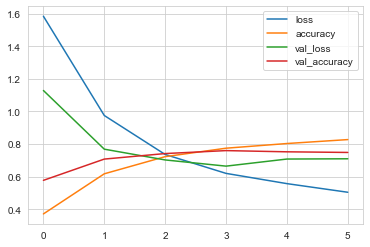

In [60]:
history = pd.DataFrame(model.history.history)
history.plot()

In [61]:
test_data.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,1,44953,NYC,02-03-2020,TRENDING: New Yorkers encounter empty supermar...,Extremely Negative
1,2,44954,"Seattle, WA",02-03-2020,When I couldn't find hand sanitizer at Fred Me...,Positive
2,3,44955,NaN,02-03-2020,Find out how you can protect yourself and love...,Extremely Positive
3,4,44956,Chicagoland,02-03-2020,#Panic buying hits #NewYork City as anxious sh...,Negative
4,5,44957,"Melbourne, Victoria",03-03-2020,#toiletpaper #dunnypaper #coronavirus #coronav...,Neutral


In [62]:
# prepare test data for prediction
test_data = test_data.drop(['UserName', 'ScreenName', 'Location', 'TweetAt'], axis=1)

In [63]:
# convert labels to numeric feature
label_encode = {'Extremely Negative':0,'Negative': 1,'Neutral': 2,'Positive':3,'Extremely Positive':4}
test_data['Sentiment']=test_data['Sentiment'].map(label_encode)

In [64]:
test_data.head()

,OriginalTweet,Sentiment
0,TRENDING: New Yorkers encounter empty supermar...,0
1,When I couldn't find hand sanitizer at Fred Me...,3
2,Find out how you can protect yourself and love...,4
3,#Panic buying hits #NewYork City as anxious sh...,1
4,#toiletpaper #dunnypaper #coronavirus #coronav...,2


In [65]:
X_test = test_data['OriginalTweet']
y_test = test_data['Sentiment']

In [ ]:
# y_test

In [66]:
X_test_tokens = np.array(tokenizer.texts_to_sequences(X_test))
X_test_pad = pad_sequences(X_test_tokens, maxlen=token_length.max())
lstm_pred = np.argmax(model.predict(X_test_pad), axis=1)

In [67]:
lstm_pred

array([1, 3, 4, ..., 2, 0, 4], dtype=int64)

In [68]:
# classification metrics
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [69]:
print(classification_report(y_test, lstm_pred))

              precision    recall  f1-score   support

           0       0.78      0.58      0.66       592
           1       0.60      0.70      0.65      1041
           2       0.81      0.68      0.74       619
           3       0.59      0.77      0.67       947
           4       0.86      0.57      0.68       599

    accuracy                           0.67      3798
   macro avg       0.73      0.66      0.68      3798
weighted avg       0.70      0.67      0.67      3798



## Logistic Regression Model

In [89]:
# import necessary libraries
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

In [73]:
# initializng lr model
lr_clf = LogisticRegression()

In [86]:
X = train_data['OriginalTweet']
y = train_data['Sentiment']

In [94]:
# pipeline the process
# TfidfVectorizer was imported for text preprocessing
lr_clf = Pipeline([('tfidf', TfidfVectorizer()), ('lr_clf', LogisticRegression(max_iter=1500))])

In [95]:
lr_clf.fit(X,y)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('lr_clf', LogisticRegression(max_iter=1500))])

In [96]:
lr_pred = lr_clf.predict(X_test)

In [97]:
lr_pred

array([2, 3, 4, ..., 2, 0, 3], dtype=int64)

In [98]:
print(classification_report(y_test, lstm_pred))

              precision    recall  f1-score   support

           0       0.78      0.58      0.66       592
           1       0.60      0.70      0.65      1041
           2       0.81      0.68      0.74       619
           3       0.59      0.77      0.67       947
           4       0.86      0.57      0.68       599

    accuracy                           0.67      3798
   macro avg       0.73      0.66      0.68      3798
weighted avg       0.70      0.67      0.67      3798



In [104]:
test_data['lstm_pred'] = lstm_pred
test_data['lr_pred'] = lr_pred

## Result

In [106]:
# highlighting the first 20 results to see how both LSTM and Logistic Regression model compare to the true sentiment result

## Recal ##
{'Extremely Negative':0,'Negative': 1,'Neutral': 2,'Positive':3,'Extremely Positive':4}

test_data.head(20)

,OriginalTweet,Sentiment,lstm_pred,lr_pred
0,TRENDING: New Yorkers encounter empty supermar...,0,1,2
1,When I couldn't find hand sanitizer at Fred Me...,3,3,3
2,Find out how you can protect yourself and love...,4,4,4
3,#Panic buying hits #NewYork City as anxious sh...,1,1,1
4,#toiletpaper #dunnypaper #coronavirus #coronav...,2,2,2
5,Do you remember the last time you paid $2.99 a...,2,2,2
6,Voting in the age of #coronavirus = hand sanit...,3,3,3
7,"@DrTedros ""We canÂt stop #COVID19 without pro...",2,1,1
8,HI TWITTER! I am a pharmacist. I sell hand san...,0,1,3
9,Anyone been in a supermarket over the last few...,4,3,3


### Result Explanation

Both LSTM and Logistic Regression model did okay in this excercise, however more could be achieved if proper model tuning was
done. I mean Hyperparameter tuning. 
The Result shows that either of the model will predict most of the classes okay. Maybe after tuning more can be achieved in 
predicting class 3 (positive sentiment).

EDA however shows that most tweeps (twitter users) have their location disabled, while  from known locations, the US and UK had the most COVID-19 tweets, this could infere from the effect of COVID-19 in those region.
The most mention was of course @realDonaldTrump the former US president, @BorisJohnson the UK prime minister also made the top
5 mentions. 

Given the type of dataset, the hashtags from tweets shows clearly what most tweets are about. 

The sentiment class which ranks from Extremely Negative to Extremely Positive also have most tweets from the US and UK.

The overall dataset has Positive sentiment with count 11422 which takes about 28% of the dataset, Extremely Positive 16% both 
account for 44% of positivity from the populace. On the other end, Negative tweets accounts for 24% and Extremely Negative 13%
both accounting for 37%. Neutral sentiment accounts for 19%. 

It could be interpreted from this analysis that most people find positivity in difficult situation and are not really swayed by
it. The negative tweets are also not far behind meaning given significant situation, both positive and negative opinion will be 
made. 

But how do we account for the neutral ones? What do we say about them?